###0.1 installation

In [ ]:
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.7 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

##3. Linear Neural Networks for Regression

###3.1. Linear Regression

####3.1.1. Basics

In [ ]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

####3.1.1.1. Model

$$ \text{price} = w_{\text{area}} \cdot \text{area} + w_{\text{age}} \cdot \text{age} + b $$

$$\hat{y} = w_1 x_1 + \cdots + w_d x_d + b.$$

$$\hat{y} = \mathbf{w}^{\top} \mathbf{x} + b.$$

$$\hat{y} = \mathbf{X} \mathbf{w} + b,$$

#### 3.1.1.2. Loss Function

$$ l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 $$

$$ L(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} l^{(i)}(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} \left( \mathbf{w}^{\top} \mathbf{x}^{(i)} + b - y^{(i)} \right)^2
 $$

$$
\mathbf{w}^*, b^* = \arg\min_{\mathbf{w}, b} L(\mathbf{w}, b)
$$

####3.1.1.3. Analytic Solution

$$
\partial_{\mathbf{w}} \| \mathbf{y} - \mathbf{Xw} \|^2 = 2 \mathbf{X}^\top (\mathbf{Xw} - \mathbf{y}) = 0 \quad \text{and hence} \quad \mathbf{X}^\top \mathbf{y} = \mathbf{X}^\top \mathbf{Xw}.
$$

$$
\mathbf{w}^* = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

#### 3.1.1.4. Minibatch Stochastic Gradient Descent

$$
(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{b}_t} \nabla_{(\mathbf{w}, b)} l^{(i)}(\mathbf{w}, b)
$$

$$
\mathbf{w} \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \nabla_{\mathbf{w}} l^{(i)}(\mathbf{w}, b)
= \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \mathbf{x}^{(i)} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)
$$

$$
b \leftarrow b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \nabla_{b} l^{(i)}(\mathbf{w}, b)
= b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)
$$

####3.1.1.5. Predictions

####3.1.2. Vectorization for Speed

In [ ]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [ ]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
  c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.18473 sec'

In [ ]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00025 sec'

###3.1.3. The Normal Distribution and Squared Loss

$$
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{1}{2 \sigma^2} (x - \mu)^2 \right)
$$

In [ ]:
def normal(x, mu, sigma):
  p = 1 / math.sqrt(2 * math.pi * sigma**2)
  return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

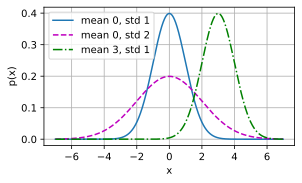

In [ ]:
# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])


$$
y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \quad \text{where} \quad \epsilon \sim \mathcal{N}(0, \sigma^2)
$$



$$
P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2 \right)
$$

$$
P(\mathbf{y} \mid \mathbf{X}) = \prod_{i=1}^{n} P(y^{(i)} \mid \mathbf{x}^{(i)})
$$

$$
- \log P(\mathbf{y} \mid \mathbf{X}) = \sum_{i=1}^{n} \left( \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left( y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b \right)^2 \right)
$$

#### 3.1.4. Linear Regression as a Neural Network

####3.1.5. Dicussion & Exercises

#####3.1.3.1. My Own Exercises

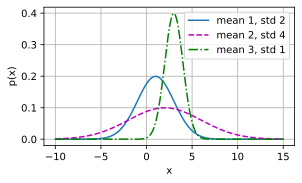

In [ ]:
# Use NumPy again for visualization
x = np.arange(-10, 15, 0.01)

# Mean and standard deviation pairs
params = [(1, 2), (2, 4), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

**1.** Recall that one of the conditions for the linear regression problem to be solvable was that the design matrix  has full rank.
What happens if this is not the case?

-> 풀랭크가 아니면 중복된 해, 무수히 많은 해가 존재할 수 있음. 그렇기 때문에 최적의 w를 찾는 것이 어려움.

###3.2. Object-Oriented Design for Implementation

In [ ]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

####3.2.1. Utilities

In [ ]:
def add_to_class(Class):
  """Register function as methods in created class."""
  def wrapper(obj):
    setattr(Class, obj.__name__, obj)
  return wrapper

In [ ]:
class A:
  def __init__(self):
    self.b = 1

a = A()

In [ ]:
@add_to_class(A)
def do(self):
  print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


In [ ]:
class HyperParameters:
  """The base class of hyperparmeters."""
  def save_hyperparameters(self, ignor=[]):
    raise NotImplemented

In [ ]:
class B(d2l.HyperParameters):
  def __init__(self, a, b, c):
    self.save_hyperparameters(ignore=['c'])
    print('self.a =', self.a, 'self.b =', self.b)
    print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [ ]:
class ProgressBoard(d2l.HyperParameters):
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

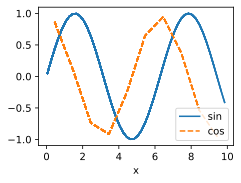

In [ ]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
  board.draw(x, np.sin(x), 'sin', every_n=2)
  board.draw(x, np.cos(x), 'cos', every_n=10)

####3.2.2. Models

In [ ]:
class Module(nn.Module, d2l.HyperParameters):
  """The base class of models."""
  def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
    super().__init__()
    self.save_hyperparameters()
    self.board = progressBoard()

  def loss(self, y_hat, y):
    raise NotImplementedError

  def forward(self, X):
    assert hasattr(self, 'net'), 'Neural network is defined'
    return self.next(X)

  def plot(self, key, value, train):
    """Plot a point in animation."""
    assert hasattr(self, 'trainer'), 'Trainer is not inited'
    self.board.xlabel = 'epoch'
    if train:
      x = self.trainer.train_batch_idx / \
          self.traner.num_train_batches
      n = self.trainer.num_train_batches / \
          self.plot_valid_per_epoch
    else:
      x = self.trainer.epoch + 1
      n = self.trainer.num_val_batches / \
         self.plot_valid_per_epoch
    self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                    ('train_' if train else 'val_') + key, every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError


#### 3.2.3. Data

In [ ]:
class DataModule(d2l.HyperParameters):
    """The base class of data."""
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

####3.2.4. Training

In [ ]:
class Trainer(d2l.HyperParameters):
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

####3.2.5. Dicussion & Exercises

**1.** Remove the save_hyperparameters statement in the B class. Can you still print self.a and self.b? Optional: if you have dived into the full implementation of the HyperParameters class, can you explain why? -> 하이퍼 파라미터가 저장되지 않아서 출력을 할 수 없음.

In [ ]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        # self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

AttributeError: 'B' object has no attribute 'a'

###3.4. Linear Regression Implementation from Scratch

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

#### 3.4.1. Defining the Model

In [ ]:
class LinearRegressionScratch(d2l.Module):
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

#### 3.4.2. Defining the Loss Function

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

#### 3.4.3. Defining the Optimization Algorithm

In [ ]:
class SGD(d2l.HyperParameters):
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

####3.4.4. Training

In [ ]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

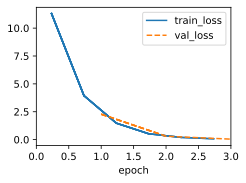

In [ ]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [ ]:
with torch.no_grad():
  print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
  print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.0891, -0.1694])
error in estimating b: tensor([0.1928])


####3.4.5. Discussion & Exercises

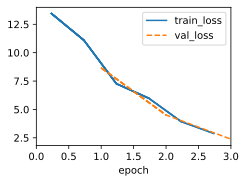

In [ ]:
model = LinearRegressionScratch(2, lr=0.01)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [ ]:
with torch.no_grad():
  print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
  print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.6678, -1.3578])
error in estimating b: tensor([1.5995])


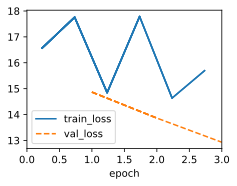

In [ ]:
model = LinearRegressionScratch(2, lr=0.001)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [ ]:
with torch.no_grad():
  print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
  print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 1.7816, -3.0530])
error in estimating b: tensor([3.7993])


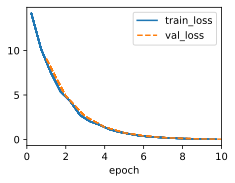

In [ ]:
model = LinearRegressionScratch(2, lr=0.01)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
with torch.no_grad():
  print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
  print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.0405, -0.1611])
error in estimating b: tensor([0.1941])


In [ ]:
data.w.shape

torch.Size([2])

In [ ]:
model.w.shape

torch.Size([2, 1])

**1.** Experiment using different learning rates to find out how quickly the loss function value drops. Can you reduce the error by increasing the number of epochs of training? -> 학습률이 너무 크면 학습이 빠르게 진행되지만 발산의 위험이나, 최소점을 찾지 못할 위험이 큼. 학습률이 너무 작으면 학습이 느리며, 잘못된 곳을 최소로 탐지할 가능성이 있음. 학습률이 작다면 epoch을 늘려 학습 성능을 높일 수 있지만, 학습률이 크다면 epoch을 늘려 학습 성능을 높이기 어려울 수 있음.

**2.** Why is the reshape method needed in the loss function? -> data.w는 ground truth이고, model.w는 모델이 예측한 값으로 둘의 형태가 다를 수 있음. 그러나 오차를 확인하기 위해서는 차원을 맞추어야 하기에 차원을 통일시킴.